In [1]:
# Importing general libraries 
import matplotlib.pyplot as plt
import numpy as np
import string
# Importing premade functions that will help clean the code
from FuncAndClass import *

In [2]:
# huffman code
sizeOfData = 100000 #np.random.randint(10000,50000)
symbols = list(string.ascii_uppercase)
arr = np.random.choice(symbols, sizeOfData) # The code
string = ""
for i in arr:
    string += i
#print("Our code is ", string)
print("")

freq = {}
# Calculating frequency
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
nodes = freq

print(freq)
print()

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True) 

huffmanCode = huffman_code_tree(nodes[0][0])
print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

compdata = ''
for char in string:
   compdata += huffmanCode[char]


[('Y', 3963), ('N', 3925), ('U', 3911), ('J', 3907), ('A', 3907), ('T', 3888), ('Q', 3887), ('G', 3884), ('I', 3877), ('E', 3867), ('Z', 3865), ('R', 3852), ('O', 3852), ('S', 3843), ('P', 3842), ('X', 3842), ('H', 3842), ('D', 3833), ('M', 3827), ('W', 3825), ('L', 3821), ('B', 3783), ('F', 3783), ('V', 3772), ('K', 3743), ('C', 3659)]

 Char | Huffman code 
----------------------
 'Y'  |        0101
 'N'  |        0100
 'U'  |        0011
 'J'  |        0010
 'A'  |        0001
 'T'  |        0000
 'Q'  |       11111
 'G'  |       11110
 'I'  |       11101
 'E'  |       11100
 'Z'  |       11011
 'R'  |       11010
 'O'  |       11001
 'S'  |       11000
 'P'  |       10111
 'X'  |       10110
 'H'  |       10101
 'D'  |       10100
 'M'  |       10011
 'W'  |       10010
 'L'  |       10001
 'B'  |       10000
 'F'  |       01111
 'V'  |       01110
 'K'  |       01101
 'C'  |       01100


In [3]:
# Comparing our compressed code to the normal ASCII code values
origData = ''.join(format(ord(i), 'b') for i in string)
origData = np.array(list(origData), dtype=int)
compressedData = np.array(list(compdata),dtype=int)

print("")
print ("Normally our code would be of size ", origData.size)
print ("After compression our code would be of size", compressedData.size)
print ("Compression ratio is", origData.size/compressedData.size)
print("")


Normally our code would be of size  700000
After compression our code would be of size 476499
Compression ratio is 1.469048203668843



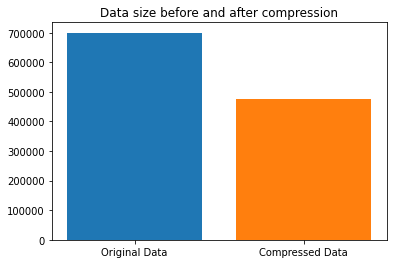

In [4]:
# plotting for better visuals
plt.bar('Original Data', origData.size, align='center')
plt.bar('Compressed Data', compressedData.size, align='center')
plt.title('Data size before and after compression')
plt.savefig('HuffmanCode_Comparision.png')
plt.show()
plt.close()

In [5]:
# hamming code

# Enter the data to be transmitted
data = compdata
# Calculate the no of Redundant Bits Required
m = len(data)
r = calcRedundantBits(m)
print("m = ", m)
print("r = ", r)
# Determine the positions of Redundant Bits
arr = posRedundantBits(data, r)

# Determine the parity bits
arr = calcParityBits(arr, r)

# Data to be transferred
arr = np.array(list(arr), dtype=int)
print("Data transferred is ", arr)
print("")

m =  476499
r =  19
Data transferred is  [1 0 1 ... 0 1 0]



The number of errors in our code is  36481
Data Transmited is  [1 0 1 ... 1 0 1]
Data Recieved is  [1 0 1 ... 1 0 1]
The Bit error ratio is  0.052115714285714286

The number of errors in our code is  1
Data Transmited is  [1 0 1 ... 0 1 0]
Data Recieved is  [1 0 1 ... 0 1 0]
The Bit error ratio is  2.098547804918996e-06



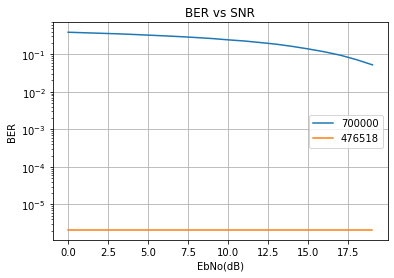

In [10]:
EbNo = np.arange(0,20)
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.title('BER vs SNR')
plt.yscale('log')
plt.grid(True)
monteTransmit(EbNo, origData)
recieveArr = monteTransmit(EbNo, arr)
plt.legend()
plt.savefig('BERSNR_Comparision.png')
plt.show()
plt.close()

In [11]:
# printing out everything and finiding the error

print("Original Data is", origData)
print("Data after compressions is", compressedData)
print("Transmitted data is", arr)
print("Recieved data is", recieveArr)
print("")

Original Data is [1 0 1 ... 1 0 1]
Data after compressions is [1 0 1 ... 1 0 0]
Transmitted data is [1 0 1 ... 0 1 0]
Recieved data is [1 0 1 ... 0 1 0]

